In [6]:
import nbimporter
import networkx as nx
import random
from matplotlib import pyplot as plt
from brute_force import brute_force
from functools import wraps
import time

In [7]:
def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        print(f"{func.__name__} took {end - start:.6f} seconds")
        return result
    return wrapper

In [2]:
def initialize(G, terminals):
    subgraph = G.subgraph(terminals)
    
    if not nx.is_connected(subgraph):
        H = nx.Graph()
    
        for u in terminals:
            for v in terminals:
                if u != v:
                    path = nx.shortest_path(G, u, v, weight="weight")
                    nx.add_path(H, path)
        subgraph = H
    
    best_tree = nx.minimum_spanning_tree(subgraph, weight="weight")
    best_w = best_tree.size(weight="weight")
    best_nodes = set(best_tree.nodes())

    return best_tree, best_w, best_nodes


In [18]:
@timeit
def tabu_search(G, terminals):
    iterations = 100
    tabu_size = 5
    best_tree, best_w, best_nodes = initialize(G, terminals)
    
    nodes = list(set(G.nodes()) - set(terminals))
    tabu_list = []

    for _ in range(iterations):
        v = random.choice(nodes)
        if v in tabu_list:
            continue

        new_nodes = best_nodes | {v}
        subgraph = G.subgraph(new_nodes)
        if nx.is_connected(subgraph):
            T = nx.minimum_spanning_tree(subgraph, weight="weight")
            w = T.size(weight="weight")
            if w < best_w:
                best_tree, best_w = T, w
                best_nodes = set(T.nodes())

        tabu_list.append(v)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

    return best_tree, best_w


In [9]:
G = nx.Graph()
edges = [
    (1,2,1), (2,3,2), (3,4,1),
    (1,5,2), (2,5,2), (3,6,3), (4,6,1),
    (5,6,2)
]
G.add_weighted_edges_from(edges)
terminals = [1,4,6]
pos = nx.spring_layout(G, seed=42)
T, w = tabu_search(G, terminals)
T1, w1 = brute_force(G, terminals)

tabu_search took 0.002597 seconds


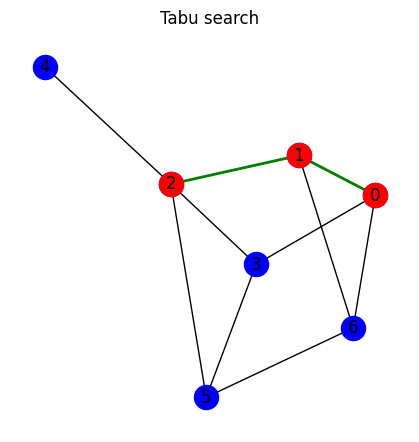

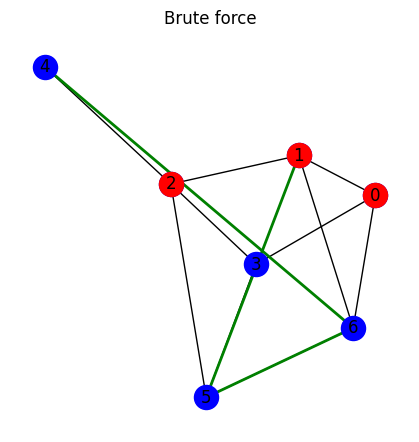

In [19]:
plt.figure(figsize = (4,4))
nx.draw(G, pos, with_labels = True, node_color = 'blue')
nx.draw_networkx_edges(T, pos, edge_color = 'green', width = 2)
nx.draw_networkx_nodes(G, pos, nodelist = terminals, node_color = 'red')
plt.title("Tabu search")
plt.show()

plt.figure(figsize = (4,4))
nx.draw(G, pos, with_labels = True, node_color = 'blue')
nx.draw_networkx_edges(T1, pos, edge_color = 'green', width = 2)
nx.draw_networkx_nodes(G, pos, nodelist = terminals, node_color ='red')
plt.title("Brute force")
plt.show()

In [13]:
K5 = nx.Graph()
edgesK5 = [
    (0, 1, 28), (0, 2, 13), (0, 3, 13), (0, 4, 22),
    (1, 2, 27), (1, 3, 28), (1, 4, 13),
    (2, 3, 19), (2, 4, 14),
    (3, 4, 19)
]
K5.add_weighted_edges_from(edgesK5)

In [14]:
K5best = nx.Graph()
edgesK5best = [
    (0, 1, 18), (0, 2, 20), (0, 3, 22), (0, 5, 10), (0, 6, 32), (0, 7, 29),
    (1, 2, 12), (1, 3, 18), (1, 4, 20), (1, 5, 29), (1, 6, 36), (1, 7, 10),
    (2, 3, 40), (2, 4, 20), (2, 5, 22), (2, 6, 21), (2, 7, 23),
    (3, 4, 22), (3, 5, 22), (3, 6, 40), (3, 7, 22),
    (4, 5, 23), (4, 6, 32), (4, 7, 20),
    (5, 6, 21), (5, 7, 33),
    (6, 7, 11)
]
K5best.add_weighted_edges_from(edgesK5best)

In [15]:
CS4234_2 = nx.Graph()
edgesCS4234_2 = [
    (0, 1, 14), (0, 3, 14), (0, 6, 8),
    (1, 2, 14), (1, 6, 14),
    (2, 3, 14), (2, 4, 10), (2, 5, 8),
    (3, 5, 8),
    (4, 2, 10),
    (5, 6, 6),
    (6, 0, 8)
]
CS4234_2.add_weighted_edges_from(edgesCS4234_2)

tabu_search took 0.000551 seconds


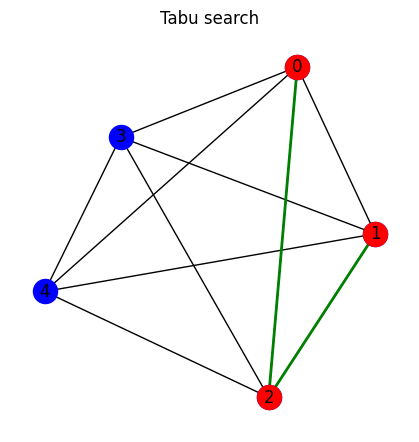

tabu_search took 0.000914 seconds


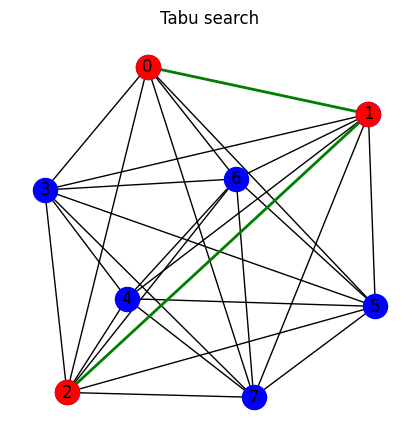

tabu_search took 0.000732 seconds


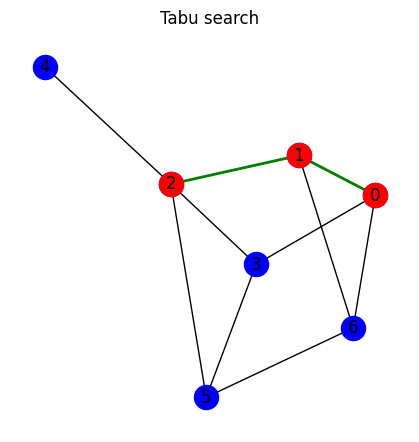

In [17]:
GS = [K5, K5best, CS4234_2]
terminals = [0,1,2]
for G in GS:
    pos = nx.spring_layout(G, seed=42)
    T, w = tabu_search(G, terminals)
    plt.figure(figsize=(4,4))
    nx.draw(G, pos, with_labels = True, node_color = 'blue')
    nx.draw_networkx_edges(T, pos, edge_color = 'green', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist = terminals, node_color = 'red')
    plt.title("Tabu search")
    plt.show()